In [213]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import missingno as msno
# from collections import Counter
# import nltk 
# from nltk.corpus import stopwords
# from nltk.tokenize import RegexpTokenizer
# import re
# from sklearn.feature_extraction.text import CountVectorizer
# import sklearn.preprocessing as preprocessing

# import warnings
# warnings.filterwarnings('ignore')
# import seaborn as sns



In [130]:
#import prepared data file from github
df = pd.read_csv(r"C:\Users\dey4d\OneDrive\Documents\GitHub\capstone_projectb\data\data_10k10q_price.csv", sep = '|')

In [131]:
df.head(2)

,company,cik,file_name,doc_type,file_date,conformed_period,bag_len,content,close_price,close_price_20
0,MMM,66740,0001558370-17-000479,10-K,20170209,20161231,10074,"['designed', 'provide', 'reader', 'financial',...",178.179993,189.860001
1,MMM,66740,0001558370-19-000470,10-K,20190207,20181231,11067,"['designed', 'provide', 'reader', 'financial',...",199.839996,209.029999


In [132]:
# df.info(verbose=True, show_counts =True)

In [133]:
## importing miss-beat file
df_missbeat = pd.read_excel(r"C:\Users\dey4d\OneDrive\Documents\GitHub\capstone_projectb\data\dow_missbeat_rev3.xlsx") 
df_missbeat['Est_EPS'] = pd.to_numeric(df_missbeat['Est_EPS'],errors = 'coerce')

df_missbeat.head(5)

,company,file_date,qtr_end_dt,Est_EPS,Act_EPS
0,AAPL,2022-01-27,2021-12-31,1.89,2.10
1,AAPL,2021-10-28,2021-09-30,1.24,1.24
2,AAPL,2021-07-27,2021-06-30,1.00,1.30
3,AAPL,2021-04-28,2021-03-31,1.00,1.40
4,AAPL,2021-01-27,2020-12-31,1.41,1.68


In [134]:
# df_missbeat.info()
df_missbeat["beat?"] = np.where(df_missbeat['Act_EPS'] > df_missbeat['Est_EPS'], True, False)
df_missbeat.head(5)

,company,file_date,qtr_end_dt,Est_EPS,Act_EPS,beat?
0,AAPL,2022-01-27,2021-12-31,1.89,2.10,True
1,AAPL,2021-10-28,2021-09-30,1.24,1.24,False
2,AAPL,2021-07-27,2021-06-30,1.00,1.30,True
3,AAPL,2021-04-28,2021-03-31,1.00,1.40,True
4,AAPL,2021-01-27,2020-12-31,1.41,1.68,True


In [135]:
import datetime

qtr_end_dt_nogap = []

for dt in df_missbeat["qtr_end_dt"]:
    dt1 = dt.strftime('%Y%m%d')
    qtr_end_dt_nogap.append(dt1)

file_date_nogap = []

for dt in df_missbeat["file_date"]:
    dt1 = dt.strftime('%Y%m%d')
    file_date_nogap.append(dt1)
    
df_missbeat['conformed_period'] = qtr_end_dt_nogap
df_missbeat['file_date'] = file_date_nogap

In [136]:
## updated file 
df_missbeat.head(5)

,company,file_date,qtr_end_dt,Est_EPS,Act_EPS,beat?,conformed_period
0,AAPL,20220127,2021-12-31,1.89,2.10,True,20211231
1,AAPL,20211028,2021-09-30,1.24,1.24,False,20210930
2,AAPL,20210727,2021-06-30,1.00,1.30,True,20210630
3,AAPL,20210428,2021-03-31,1.00,1.40,True,20210331
4,AAPL,20210127,2020-12-31,1.41,1.68,True,20201231


In [137]:
## converting conformed period to int
df_missbeat['conformed_period']=df_missbeat.conformed_period.astype('int64')
df_missbeat['file_date']=df_missbeat.file_date.astype('int64')

df_missbeat_updated = df_missbeat.loc[:,['company','conformed_period','file_date','beat?']]

df_missbeat_updated.head(5)

,company,conformed_period,file_date,beat?
0,AAPL,20211231,20220127,True
1,AAPL,20210930,20211028,False
2,AAPL,20210630,20210727,True
3,AAPL,20210331,20210428,True
4,AAPL,20201231,20210127,True


In [138]:
## capturing miss or beat
beat = {}

for index, row in df.iterrows():
    company = row['company']
    file_dt = row['file_date']
    conformed_pd = row['conformed_period']  
    beat[index] = ""
    for idx, line in df_missbeat_updated.iterrows():
        if line['company'] == company and conformed_pd -15 <=line['conformed_period'] <= conformed_pd +20:
            beat[index] = line['beat?']
            break

        elif line['company'] == company and file_dt - 15 <= line['file_date'] <= file_dt + 20 :            
            beat[index] = line['beat?']
            break


In [139]:
# i = 1

# for val in beat.values():
#     if val == "":
#         i = i +1 
# print(i)

In [140]:
## coping df from df_new and adding the beat feature
df_new = df

df_new['beat_expect'] = beat.values()

df_new.head(3)

,company,cik,file_name,doc_type,file_date,conformed_period,bag_len,content,close_price,close_price_20,beat_expect
0,MMM,66740,0001558370-17-000479,10-K,20170209,20161231,10074,"['designed', 'provide', 'reader', 'financial',...",178.179993,189.860001,True
1,MMM,66740,0001558370-19-000470,10-K,20190207,20181231,11067,"['designed', 'provide', 'reader', 'financial',...",199.839996,209.029999,True
2,MMM,66740,0001558370-21-000737,10-K,20210204,20201231,10765,"['sections', 'company', 'annual', 'report', 'f...",177.100006,177.630005,True


In [141]:
## capturing the null rows
# df_null_rows = pd.DataFrame(columns = ['company', 'doc_type', 'file_date', 'conformed_period', 'beat_expect'])

# idx = 0

# for index, row in df_new.iterrows():
#     beat = row['beat_expect']    
#     if beat == "": 
#         df_null_rows.loc[idx] = [row['company'], row['doc_type'], row['file_date'], row['conformed_period'], row['beat_expect']]
#         idx = idx + 1   


In [142]:
# df_null_rows.head(5)

In [143]:
## updating missing values of beat with true
df_new['beat_expect']=df_missbeat.conformed_period.astype('bool')

for index, row in df_new.iterrows():
    if row['beat_expect'] == "":     
        df_new.loc[index, "beat_expect"] = True   


In [145]:
# df_new.info(verbose=True, show_counts =True)

In [146]:
percent_change = []

for index, row in df_new.iterrows():
    close_price = row['close_price'] 
    close_price_20 = row['close_price_20']
    per_change = ((close_price_20 - close_price) / close_price)*100
    percent_change.append(per_change)
    
print(len(percent_change))

547


In [147]:
## adding the percentage change column

df_new['percent_change'] = percent_change

print('='*50)
print('the range of change: ', (max(df_new['percent_change']) - min(df_new['percent_change'])))
print('='*50)

df_new.head(3)

the range of change:  76.45463509838936


,company,cik,file_name,doc_type,file_date,conformed_period,bag_len,content,close_price,close_price_20,beat_expect,percent_change
0,MMM,66740,0001558370-17-000479,10-K,20170209,20161231,10074,"['designed', 'provide', 'reader', 'financial',...",178.179993,189.860001,True,6.555174
1,MMM,66740,0001558370-19-000470,10-K,20190207,20181231,11067,"['designed', 'provide', 'reader', 'financial',...",199.839996,209.029999,True,4.598680
2,MMM,66740,0001558370-21-000737,10-K,20210204,20201231,10765,"['sections', 'company', 'annual', 'report', 'f...",177.100006,177.630005,True,0.299265


## EDA

In [148]:
## collecting words from content to find word frequency
count_content = []

length = df_new.shape[0]

for t in range(length):
    content = df_new.loc[t,'content']
    for words in content.split():
        count_content.append(words)

content_counter = Counter(count_content).most_common(20) ## most common 20 words in ham text
content_counter = pd.DataFrame.from_dict(content_counter)
content_counter = content_counter.rename(columns={0: "content words", 1 : "count"})  

print("Numbers of tokens in the content: ", len(count_content))

Numbers of tokens in the content:  4173877


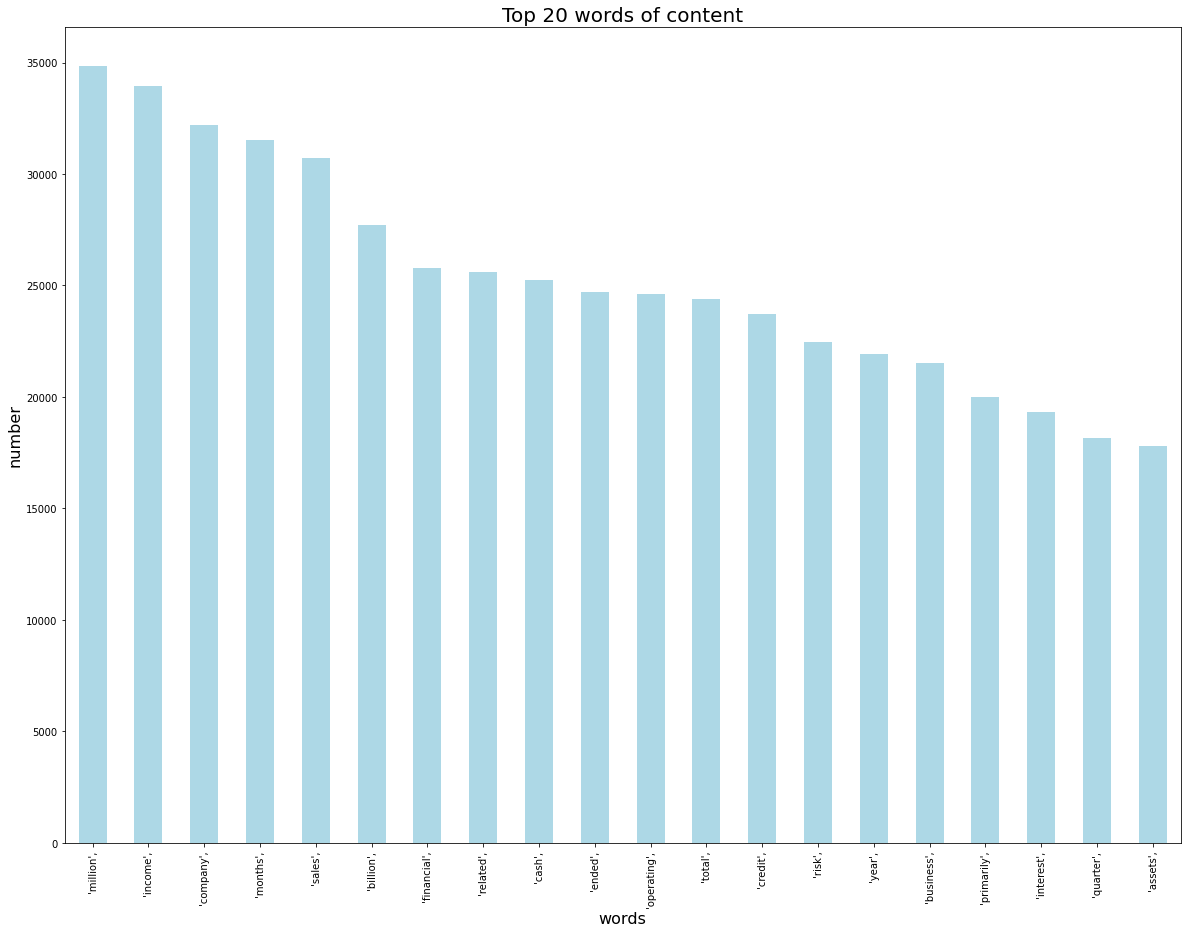

In [149]:
# ## plot for most common 20 words in ham
content_counter.plot.bar(legend = False, color = 'lightblue',figsize = (20,15))
y_pos = np.arange(len(content_counter["content words"]))
plt.xticks(y_pos, content_counter["content words"])
plt.title('Top 20 words of content', fontsize = 20)
plt.xlabel('words', fontsize = 16)
plt.ylabel('number', fontsize = 16)
plt.show()

## Creating word features

In [150]:
# Function to convert  
def listToString(s):     
    # initialize an empty string
    str1 = " "     
    # return string  
    return (str1.join(s))

In [151]:
## Cleaning df text 

df_cleaned = df_new
length = df_new.shape[0]

for i in range(length):
    updated = re.sub('[^a-zA-Z]', ' ', df_new['content'][i])
    updated = updated.lower()
    updated = updated.split()
    updated_rev = []
    for w in updated: 
        ''' adding additional creteria for word length'''
        if len(w) > 3: 
            updated_rev.append(w)
    updated_str = listToString(updated_rev)                       ## Converted back to string 
    df_cleaned.loc[i,'Text'] = updated_str

In [152]:
df_cleaned.head(2)

,company,cik,file_name,doc_type,file_date,conformed_period,bag_len,content,close_price,close_price_20,beat_expect,percent_change,Text
0,MMM,66740,0001558370-17-000479,10-K,20170209,20161231,10074,"['designed', 'provide', 'reader', 'financial',...",178.179993,189.860001,True,6.555174,designed provide reader financial statements n...
1,MMM,66740,0001558370-19-000470,10-K,20190207,20181231,11067,"['designed', 'provide', 'reader', 'financial',...",199.839996,209.029999,True,4.598680,designed provide reader financial statements n...


In [153]:
# ### keeping only the month in the date 
# df_cleaned.info()

In [154]:
## keeping the features needed for model building
df_new_updated = df_cleaned.drop(columns = ['cik','file_name','content'])
df_new_updated.head(3)

,company,doc_type,file_date,conformed_period,bag_len,close_price,close_price_20,beat_expect,percent_change,Text
0,MMM,10-K,20170209,20161231,10074,178.179993,189.860001,True,6.555174,designed provide reader financial statements n...
1,MMM,10-K,20190207,20181231,11067,199.839996,209.029999,True,4.598680,designed provide reader financial statements n...
2,MMM,10-K,20210204,20201231,10765,177.100006,177.630005,True,0.299265,sections company annual report form year ended...


In [155]:
## renaming company feature to company_ticker to avoid duplicate name later
df_new_updated.rename(columns = {'company':'company_ticker', }, inplace = True)

In [157]:
# df_new_updated.info()

In [158]:
## Counter verterizing 
MAX_FEATURES = 20000

cv = CountVectorizer(max_features = MAX_FEATURES, lowercase = False)
data_cv = cv.fit_transform(df_new_updated['Text'])

In [159]:
dfsp = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
print(dfsp.head(3))
print('='*100)
print('Size of the Count Vector Matrix: ', dfsp.shape)
'''it is a very sparse matrix with 18661 features'''

   aaaasset  aaacalifornia  aaacommercial  aaairport  aaall  aaamassachusetts  \
0         0              0              0          0      0                 0   
1         0              0              0          0      0                 0   
2         0              0              0          0      0                 0   

   aaaminnesota  aaaunited  aaawashington  aabp  ...  zones  zoning  \
0             0          0              0     0  ...      0       0   
1             0          0              0     0  ...      0       0   
2             0          0              0     0  ...      0       0   

   zontivity  zoom  zostavax  zoster  zscaler  zvex  zyrtec  zytiga  
0          0     0         0       0        0     0       0       0  
1          0     0         0       0        0     0       0       0  
2          0     0         0       0        0     0       0       0  

[3 rows x 18661 columns]
Size of the Count Vector Matrix:  (547, 18661)


'it is a very sparse matrix with 20000 features'

In [160]:
## replacing text column with word features
df_new_updated_2 = df_new_updated.drop(columns = ['Text'])
df_final = pd.concat([df_new_updated_2, dfsp], axis=1, join='inner')

In [176]:
df_final.head(3)

,company_ticker,doc_type,file_date,conformed_period,bag_len,close_price,close_price_20,beat_expect,percent_change,aaaasset,...,zoning,zontivity,zoom,zostavax,zoster,zscaler,zvex,zyrtec,zytiga,conf_pd_mon
0,MMM,10-K,20170209,20161231,10074,178.179993,189.860001,True,6.555174,0,...,0,0,0,0,0,0,0,0,0,12
1,MMM,10-K,20190207,20181231,11067,199.839996,209.029999,True,4.598680,0,...,0,0,0,0,0,0,0,0,0,12
2,MMM,10-K,20210204,20201231,10765,177.100006,177.630005,True,0.299265,0,...,0,0,0,0,0,0,0,0,0,12


In [177]:
## extracting the month only
df_final['conformed_period']=df_final.conformed_period.astype('str')

confor_period = df_final['conformed_period']

conf_pd_mon = []

for pd in confor_period:
    mon = pd[4:6]
    conf_pd_mon.append(mon)
    
# adding the confromed period month to the dataframe
df_final["conf_pd_mon"] = conf_pd_mon

In [234]:
df_final_2 = df_final.drop(columns = ['file_date','conformed_period'])

In [235]:
# df_final_2.head(2)

In [236]:
import pandas as pd
categorical_columns = ['company_ticker','doc_type','beat_expect','conf_pd_mon']

for column in categorical_columns:
#     print(column, ' ', df_final_2.dtypes[column])
    tempdf = pd.get_dummies(df_final_2[column], prefix=column)
    df_final_2 = pd.merge(
        left=df_final_2,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    df_final_2 = df_final_2.drop(columns=column)


In [237]:
df_final_2.head(2)

,bag_len,close_price,close_price_20,percent_change,aaaasset,aaacalifornia,aaacommercial,aaairport,aaall,aaamassachusetts,...,conf_pd_mon_03,conf_pd_mon_04,conf_pd_mon_05,conf_pd_mon_06,conf_pd_mon_07,conf_pd_mon_08,conf_pd_mon_09,conf_pd_mon_10,conf_pd_mon_11,conf_pd_mon_12
0,10074,178.179993,189.860001,6.555174,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,11067,199.839996,209.029999,4.598680,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [238]:
### Converting Precentage change to boolean variable based on whether the change is exceeding 7%

per_change_exceeding = []

for index, row in df_final_2.iterrows():
    if row['percent_change'] > 5:     
          per_change_exceeding.append("True")
    else: 
        per_change_exceeding.append("False")

In [239]:
## adding the response variable to the dataframe and dropping contineous values of percent change
df_final_2["per_change_exceeding"] = per_change_exceeding
df_final_2 = df_final_2.drop(columns = ['percent_change'])

'Though not perfect, it is not unbalance as the true represents more than 20%'

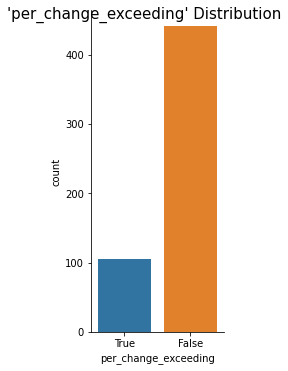

In [240]:
## ploting the distribution of response variable 
missbeat_plot = sns.catplot(x="per_change_exceeding", kind="count",data=df_final_2,height=5, aspect=.5)
missbeat_plot.fig.suptitle("'per_change_exceeding' Distribution",
                  fontsize=15, fontdict={"weight": "bold"})
'''Though not perfect, it is not unbalance as the true represents more than 20%'''

## Train and Test split

In [241]:
## X for explanatory variables and y for the response variable
y = df_final_2['per_change_exceeding']
X = df_final_2.drop('per_change_exceeding', axis=1)
print('Size of target vector: ', y.shape)
print('='*50)
print('Size of explanatory matrix: ',X.shape)

Size of target vector:  (547,)
Size of explanatory matrix:  (547, 18709)


In [251]:
## Spliting data using tratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

for train, test in cv.split(X,y):
    X_train = X.iloc[train] 
    X_test  = X.iloc[test] 
    y_train = y.iloc[train]
    y_test  = y.iloc[test] 

## Model 1 - Dense Network